CS4001/4042 Assignment 1, Part B, Q3
---

Besides ensuring that your neural network performs well, it is important to be able to explain the model’s decision. **Captum** is a very handy library that helps you to do so for PyTorch models.

Many model explainability algorithms for deep learning models are available in Captum. These algorithms are often used to generate an attribution score for each feature. Features with larger scores are more ‘important’ and some algorithms also provide information about directionality (i.e. a feature with very negative attribution scores means the larger the value of that feature, the lower the value of the output).

In general, these algorithms can be grouped into two paradigms:
- **perturbation based approaches** (e.g. Feature Ablation)
- **gradient / backpropagation based approaches** (e.g. Saliency)

The former adopts a brute-force approach of removing / permuting features one by one and does not scale up well. The latter depends on gradients and they can be computed relatively quickly. But unlike how backpropagation computes gradients with respect to weights, gradients here are computed **with respect to the input**. This gives us a sense of how much a change in the input affects the model’s outputs.





---



---



In [ ]:
!pip install captum

In [ ]:
SEED = 42

import os

import random
random.seed(SEED)

import numpy as np
np.random.seed(SEED)

import pandas as pd

import torch
import torch.nn as nn

from captum.attr import Saliency, InputXGradient, IntegratedGradients, GradientShap, FeatureAblation

> First, load the dataset following the splits in Question B1. To keep things simple, we will **limit our analysis to numeric / continuous features only**. Drop all categorical features from the dataframes. Do not standardise the numerical features for now.



In [ ]:
# TODO: Enter your code here
# TODO: Enter your code here
df_start = pd.read_csv('hdb_price_prediction.csv',index_col = None)
columns_to_drop = ["full_address", "nearest_stn", "month", "town", "flat_model_type", "storey_range"]
df = df_start.drop(columns_to_drop,axis=1)

continuous_columns = ["dist_to_nearest_stn", "dist_to_dhoby", "degree_centrality", "eigenvector_centrality", "remaining_lease_years", "floor_area_sqm"]
drop_year = ['year']
target_column = ["resale_price"]

X_explore_df = df.drop(target_column,axis=1)
X_explore_df = X_explore_df.drop(drop_year,axis=1).to_numpy()
y_explore_df = df['resale_price'].to_numpy()

train_data = df[df['year'] <= 2019]
val_data = df[df['year'] == 2020]
test_data = df[df['year'] == 2021]

train_data.reset_index(drop=True, inplace=True)
val_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

train_data = train_data.drop(drop_year,axis=1)
val_data = val_data.drop(drop_year,axis=1)
test_data = test_data.drop(drop_year,axis=1)

X_train = train_data.drop(target_column, axis = 1)
y_train = train_data['resale_price']

X_val = val_data.drop(target_column, axis = 1)
y_val = val_data['resale_price']

X_test = test_data.drop(target_column, axis = 1)
y_test = test_data['resale_price']

X_test_sample = X_test.sample(1000, random_state = SEED)
y_test_sample = y_test.sample(1000, random_state = SEED)


type(X_train)

pandas.core.frame.DataFrame

> Follow this tutorial to generate the plot from various model explainability algorithms (https://captum.ai/tutorials/House_Prices_Regression_Interpret).
Specifically, make the following changes:
- Use a feedforward neural network with 3 hidden layers, each having 5 neurons. Train using Adam optimiser with learning rate of 0.001.
- Use Saliency, Input x Gradients, Integrated Gradients, GradientSHAP, Feature Ablation


In [ ]:
# TODO: Enter your code here
import sklearn
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

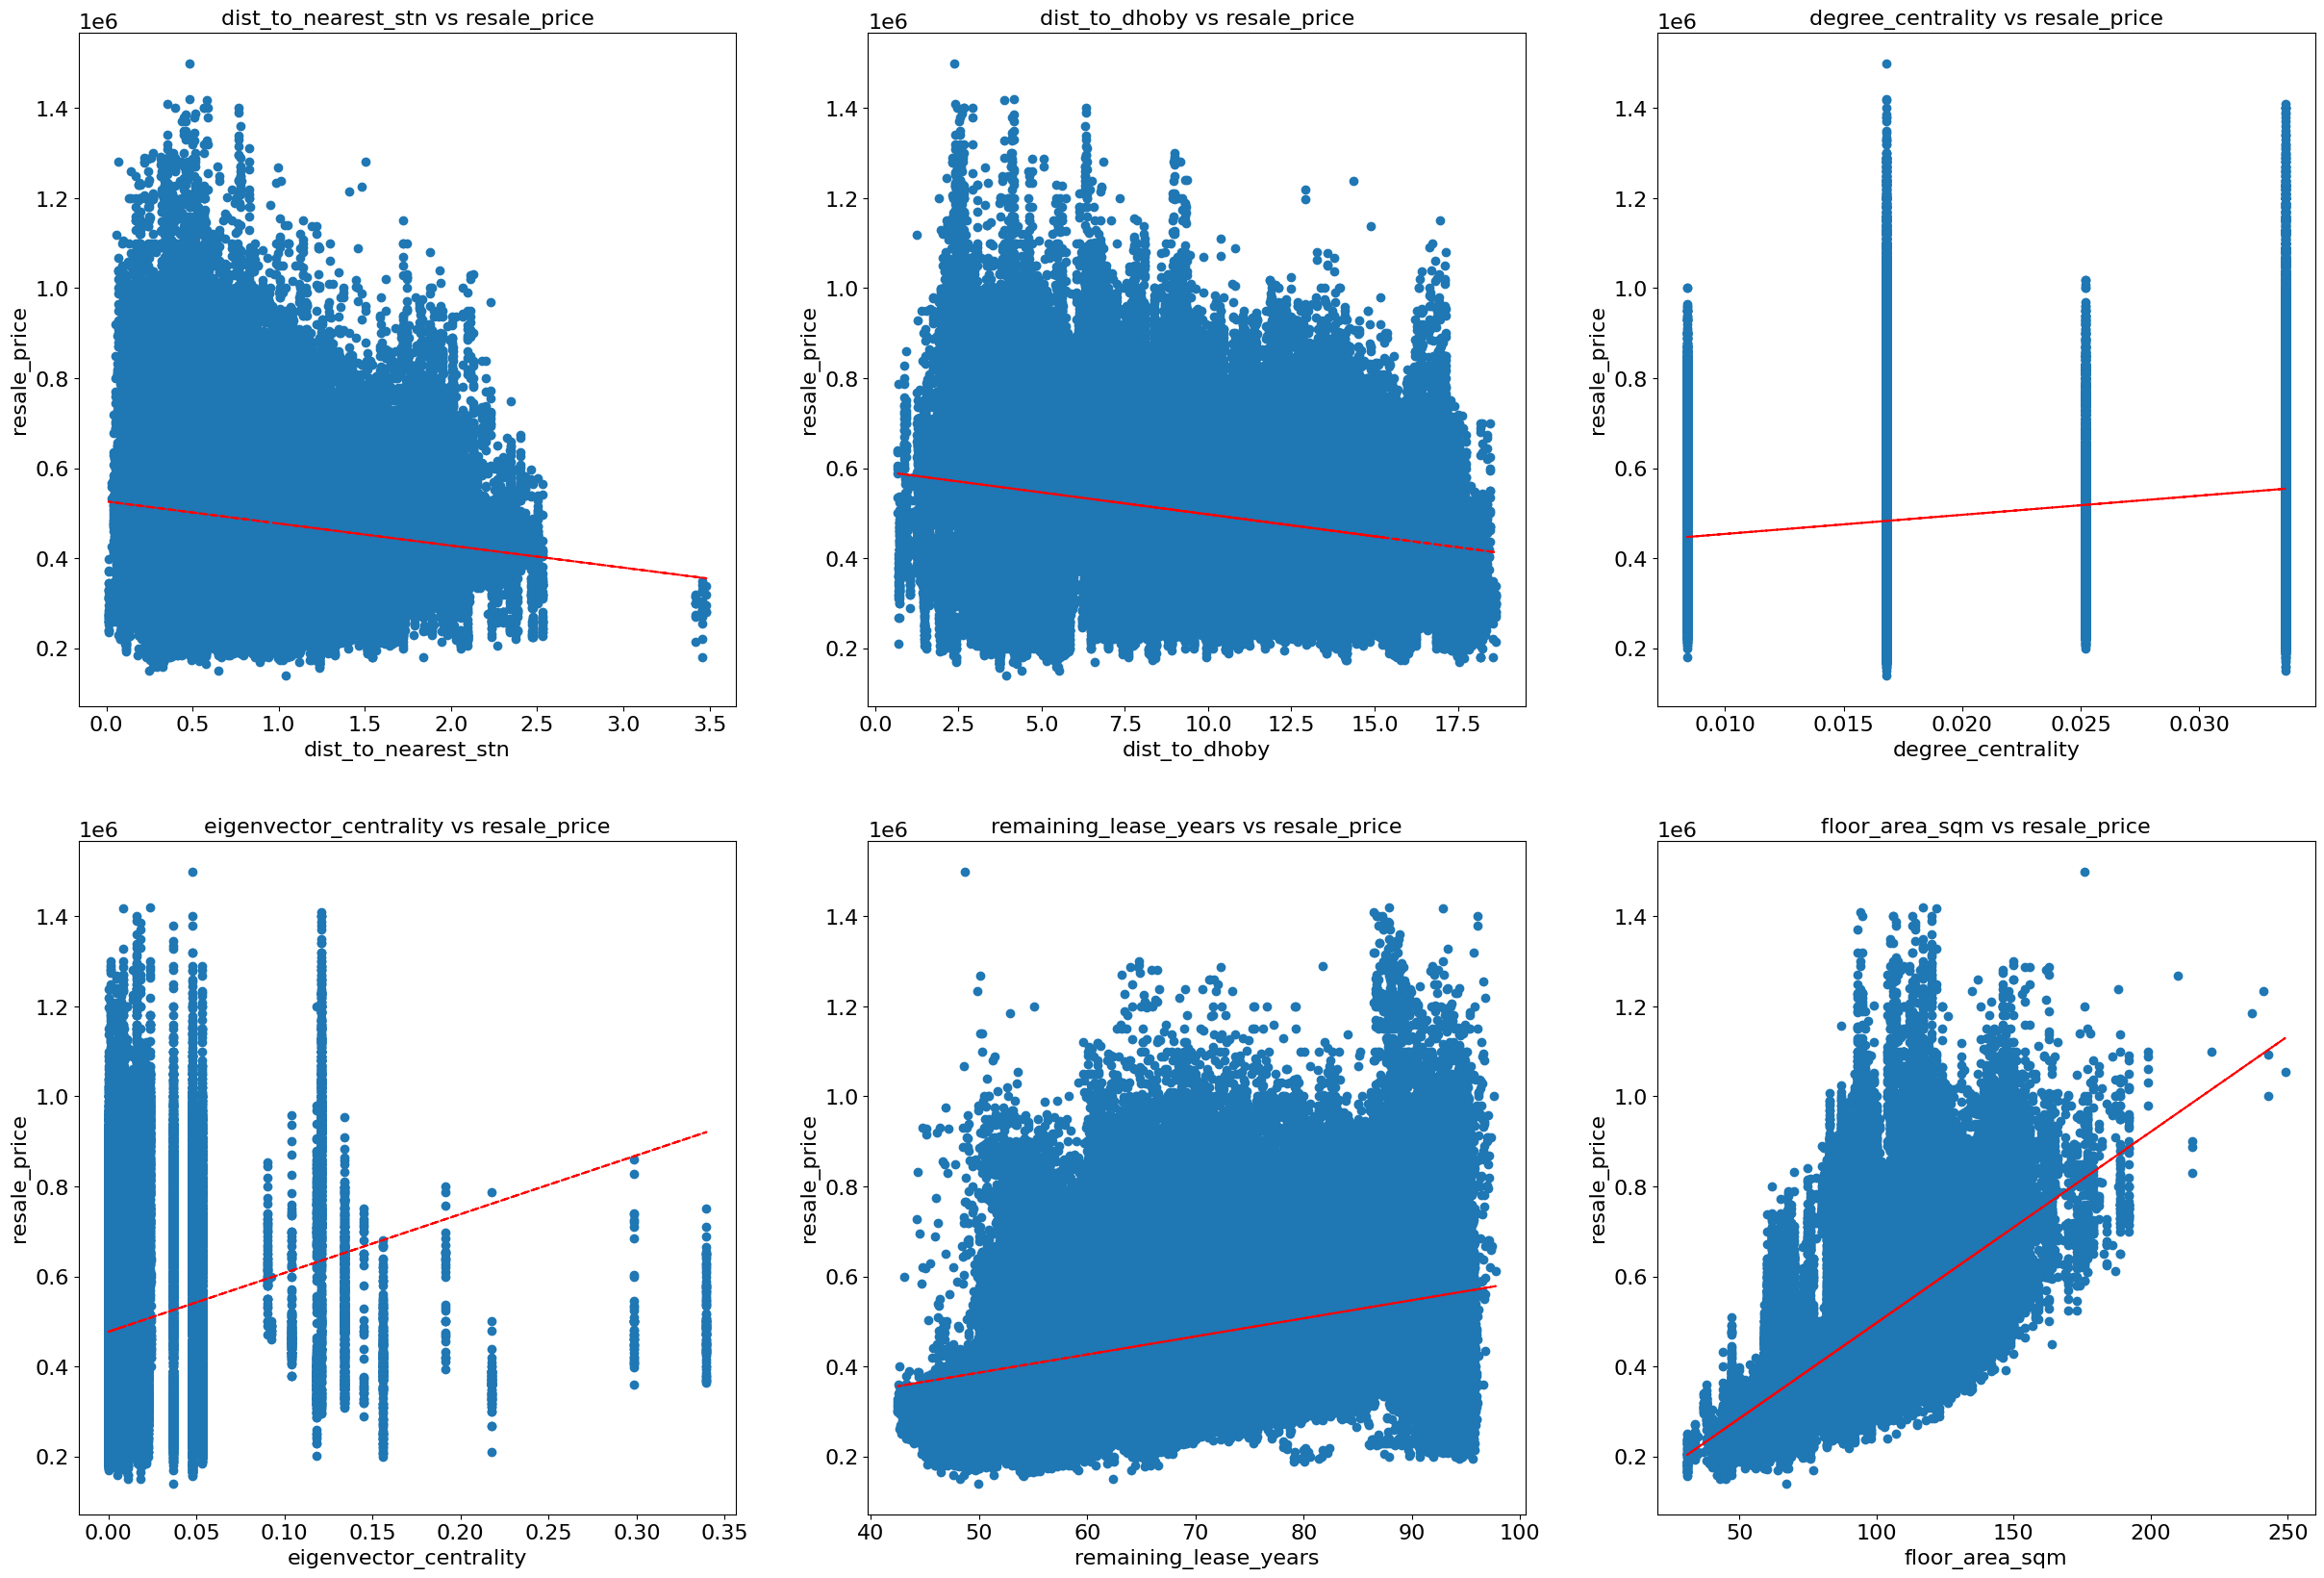

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(nrows = 2, ncols=3, figsize=(30, 20))
print(enumerate(zip(axs.flat, continuous_columns)))
for i, (ax, col) in enumerate(zip(axs.flat, continuous_columns)):
    x = X_explore_df[:,i]
    pf = np.polyfit(x, y_explore_df, 1)
    p = np.poly1d(pf)

    ax.plot(x, y_explore_df, 'o')
    ax.plot(x, p(x),"r--")

    ax.set_title(col + ' vs resale_price')
    ax.set_xlabel(col)
    ax.set_ylabel('resale_price')

From the diagram above we can tell that some of the most influential features that are correlated with the output resale price are:

1. floor_area_sqm
2. dist_to_nearest_stn

In [ ]:
# TODO: Enter your code here

X_train = torch.tensor(X_train.values).float()
y_train = torch.tensor(y_train.values).view(-1, 1).float()

X_val = torch.tensor(X_val.values).float()
y_val = torch.tensor(y_val.values).view(-1, 1).float()

X_test = torch.tensor(X_test.values).float()
y_test = torch.tensor(y_test.values).view(-1, 1).float()

X_test_sample = torch.tensor(X_test_sample.values).float()
y_test_sample = torch.tensor(y_test_sample.values).view(-1, 1).float()


datasets = torch.utils.data.TensorDataset(X_train, y_train)
train_iter = torch.utils.data.DataLoader(datasets, batch_size=1024, shuffle=True)


In [ ]:
num_epochs = 200
learning_rate = 0.001
size_hidden1 = 5
size_hidden2 = 5
size_hidden3 = 5
size_hidden4 = 1 # The output layer

In [ ]:
X_train

tensor([[1.0073e+00, 7.0060e+00, 1.6807e-02, 6.2428e-03, 6.1333e+01, 4.4000e+01],
        [1.2714e+00, 7.9838e+00, 1.6807e-02, 6.2428e-03, 6.0583e+01, 6.7000e+01],
        [1.0697e+00, 9.0907e+00, 1.6807e-02, 2.4586e-03, 6.2417e+01, 6.7000e+01],
        ...,
        [4.4587e-01, 1.3498e+01, 1.6807e-02, 9.6841e-04, 7.1500e+01, 1.6400e+02],
        [5.5277e-01, 1.3598e+01, 1.6807e-02, 9.6841e-04, 7.1500e+01, 1.6400e+02],
        [4.7588e-01, 1.2739e+01, 1.6807e-02, 9.6841e-04, 6.7083e+01, 1.4500e+02]])

In [ ]:
class HDBHousingModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin1 = nn.Linear(6, size_hidden1)
        self.relu1 = nn.ReLU()
        self.lin2 = nn.Linear(size_hidden1, size_hidden2)
        self.relu2 = nn.ReLU()
        self.lin3 = nn.Linear(size_hidden2, size_hidden3)
        self.relu3 = nn.ReLU()
        self.lin4 = nn.Linear(size_hidden3, size_hidden4)

    def forward(self, input):
        return self.lin4(self.relu3(self.lin3(self.relu2(self.lin2(self.relu1(self.lin1(input)))))))

In [ ]:
model = HDBHousingModel()
model.train()

HDBHousingModel(
  (lin1): Linear(in_features=6, out_features=5, bias=True)
  (relu1): ReLU()
  (lin2): Linear(in_features=5, out_features=5, bias=True)
  (relu2): ReLU()
  (lin3): Linear(in_features=5, out_features=5, bias=True)
  (relu3): ReLU()
  (lin4): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
criterion = nn.MSELoss()

In [ ]:
def train(model_inp, num_epochs = num_epochs):
    optimizer = torch.optim.Adam(model_inp.parameters(), lr = learning_rate)
    for epoch in range(num_epochs):  # loop over the dataset multiple times
        running_loss = 0.0
        for inputs, labels in train_iter:
            # forward pass
            outputs = model_inp(inputs)
            # defining loss
            loss = criterion(outputs, labels)
            # zero the parameter gradients
            optimizer.zero_grad()
            # computing gradients
            loss.backward()
            # accumulating running loss
            running_loss += loss.item()
            # updated weights based on computed gradients
            optimizer.step()
        if epoch % 20 == 0:
            print('Epoch [%d]/[%d] running accumulative loss across all batches: %.3f' %
                  (epoch + 1, num_epochs, running_loss))
        running_loss = 0.0

In [ ]:
train(model)

Epoch [1]/[200] running accumulative loss across all batches: 13628130050048.000
Epoch [21]/[200] running accumulative loss across all batches: 5734434185216.000
Epoch [41]/[200] running accumulative loss across all batches: 995889631232.000
Epoch [61]/[200] running accumulative loss across all batches: 960489068544.000
Epoch [81]/[200] running accumulative loss across all batches: 913672727552.000
Epoch [101]/[200] running accumulative loss across all batches: 866143483904.000
Epoch [121]/[200] running accumulative loss across all batches: 814506137600.000
Epoch [141]/[200] running accumulative loss across all batches: 759604290560.000
Epoch [161]/[200] running accumulative loss across all batches: 689599371264.000
Epoch [181]/[200] running accumulative loss across all batches: 581643932672.000


In [ ]:
model.eval()
outputs = model(X_test)
print(outputs)

tensor([[222067.8125],
        [222067.8125],
        [330052.7188],
        ...,
        [604467.7500],
        [503067.6875],
        [699374.5000]], grad_fn=<AddmmBackward0>)


In [ ]:
err = np.sqrt(mean_squared_error(outputs.detach().numpy(), y_test.detach().numpy()))

print('model err: ', err)

model err:  111063.9


In [ ]:
ig = IntegratedGradients(model)
gs = GradientShap(model)
fa = FeatureAblation(model)
sa = Saliency(model)
ixg = InputXGradient(model)

ig_attr_test = ig.attribute(X_test_sample, n_steps=50)
ixg_attr_test = ixg.attribute(X_test_sample)
sa_attr_test = sa.attribute(X_test_sample)
gs_attr_test = gs.attribute(X_test_sample, X_train)
fa_attr_test = fa.attribute(X_test_sample)

/usr/local/lib/python3.10/dist-packages/captum/_utils/gradient.py:57: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  warnings.warn(


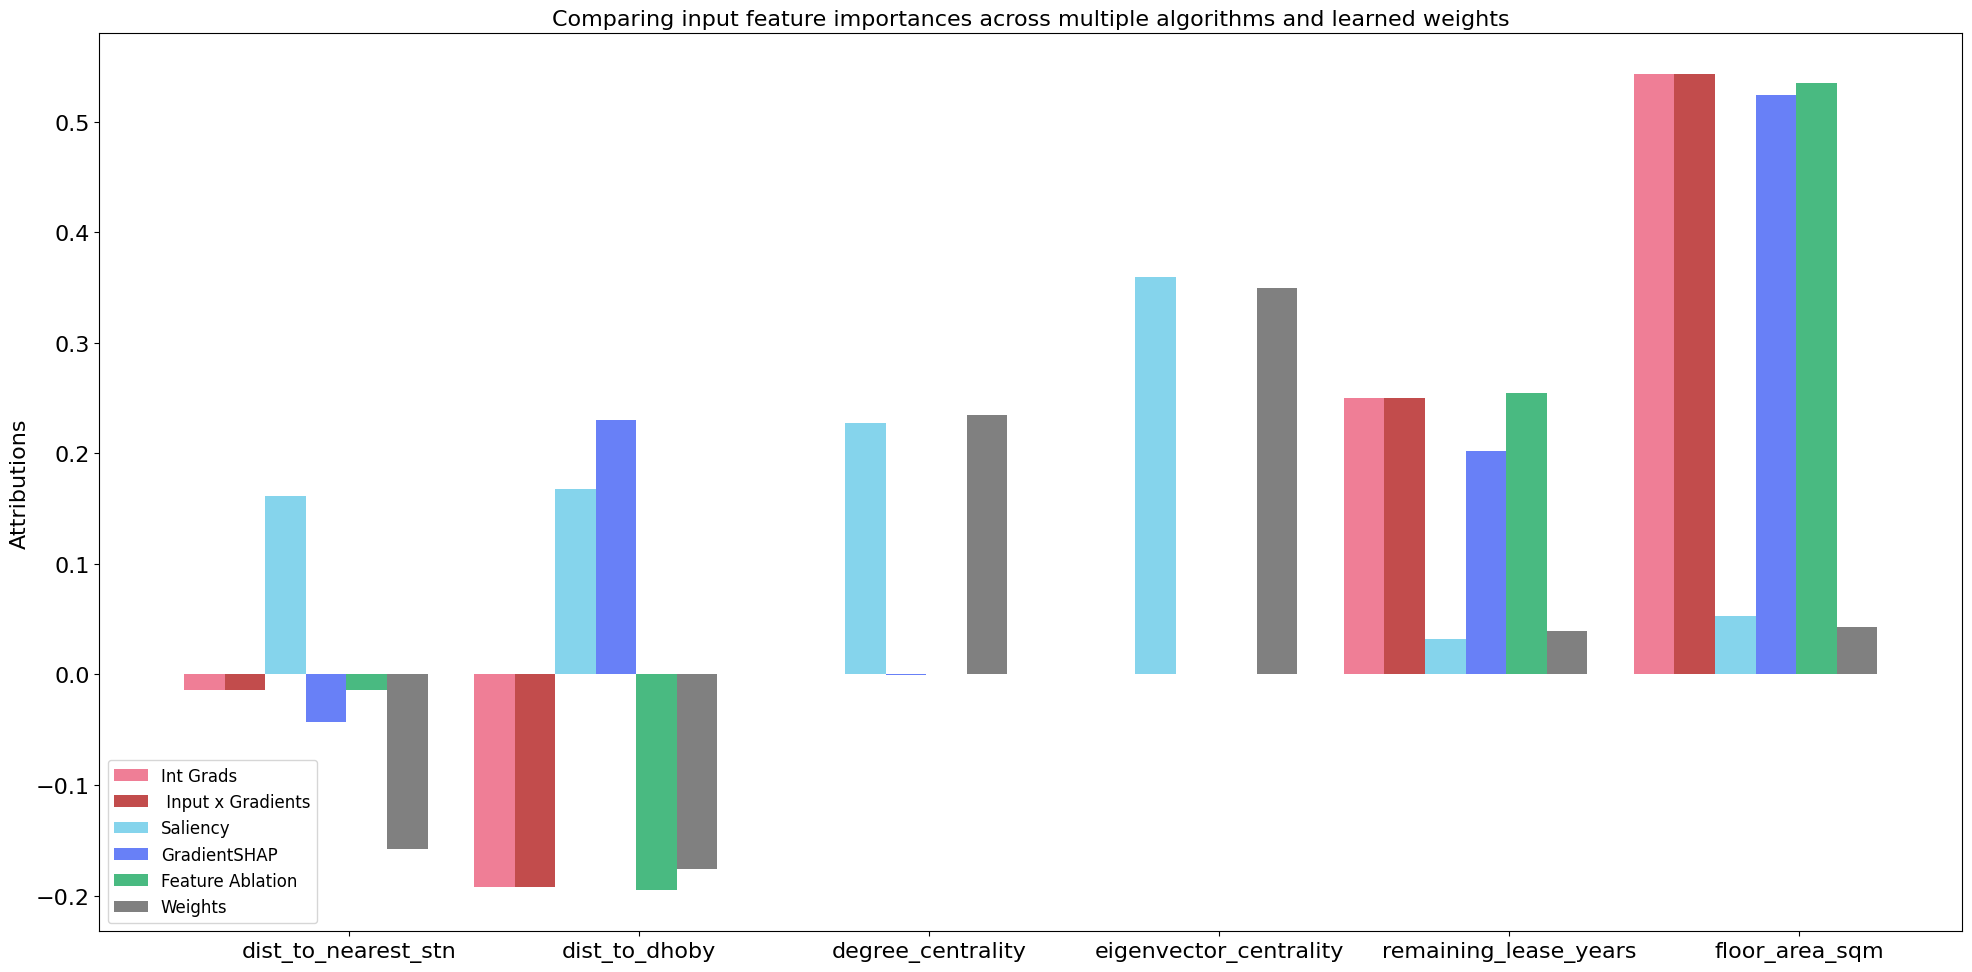

In [ ]:
x_axis_data = np.arange(X_test_sample.shape[1])
x_axis_data_labels = list(map(lambda idx: continuous_columns[idx], x_axis_data))

ig_attr_test_sum = ig_attr_test.detach().numpy().sum(0)
ig_attr_test_norm_sum = ig_attr_test_sum / np.linalg.norm(ig_attr_test_sum, ord=1)

ixg_attr_test_sum = ixg_attr_test.detach().numpy().sum(0)
ixg_attr_test_norm_sum = ixg_attr_test_sum / np.linalg.norm(ixg_attr_test_sum, ord=1)

sa_attr_test_sum = sa_attr_test.detach().numpy().sum(0)
sa_attr_test_norm_sum = sa_attr_test_sum / np.linalg.norm(sa_attr_test_sum, ord=1)

gs_attr_test_sum = gs_attr_test.detach().numpy().sum(0)
gs_attr_test_norm_sum = gs_attr_test_sum / np.linalg.norm(gs_attr_test_sum, ord=1)

fa_attr_test_sum = fa_attr_test.detach().numpy().sum(0)
fa_attr_test_norm_sum = fa_attr_test_sum / np.linalg.norm(fa_attr_test_sum, ord=1)

lin_weight = model.lin1.weight[0].detach().numpy()
y_axis_lin_weight = lin_weight / np.linalg.norm(lin_weight, ord=1)

width = 0.14
legends = ['Int Grads', ' Input x Gradients','Saliency', 'GradientSHAP', 'Feature Ablation', 'Weights']

plt.figure(figsize=(20, 10))

ax = plt.subplot()
ax.set_title('Comparing input feature importances across multiple algorithms and learned weights')
ax.set_ylabel('Attributions')

FONT_SIZE = 16
plt.rc('font', size=FONT_SIZE)            # fontsize of the text sizes
plt.rc('axes', titlesize=FONT_SIZE)       # fontsize of the axes title
plt.rc('axes', labelsize=FONT_SIZE)       # fontsize of the x and y labels
plt.rc('legend', fontsize=FONT_SIZE - 4)  # fontsize of the legend

ax.bar(x_axis_data, ig_attr_test_norm_sum, width, align='center', alpha=0.8, color='#eb5e7c')
ax.bar(x_axis_data + width, ixg_attr_test_norm_sum, width, align='center', alpha=0.7, color='#A90000')
ax.bar(x_axis_data + 2 * width, sa_attr_test_norm_sum, width, align='center', alpha=0.6, color='#34b8e0')
ax.bar(x_axis_data + 3 * width, gs_attr_test_norm_sum, width, align='center',  alpha=0.8, color='#4260f5')
ax.bar(x_axis_data + 4 * width, fa_attr_test_norm_sum, width, align='center', alpha=1.0, color='#49ba81')
ax.bar(x_axis_data + 5 * width, y_axis_lin_weight, width, align='center', alpha=1.0, color='grey')
ax.autoscale_view()
plt.tight_layout()

ax.set_xticks(x_axis_data + 0.5)
ax.set_xticklabels(x_axis_data_labels)

plt.legend(legends, loc=3)
plt.show()

In [ ]:
# Compute the attributions of the output with respect to the inputs of the fourth linear layer
from captum.attr import LayerConductance, LayerActivation, LayerIntegratedGradients
lc = LayerConductance(model, model.lin4)

# shape: test_examples x size_hidden
lc_attr_test = lc.attribute(X_test_sample, n_steps=100, attribute_to_layer_input=True)

# weights from forth linear layer
# shape: size_hidden4 x size_hidden3
lin4_weight = model.lin4.weight

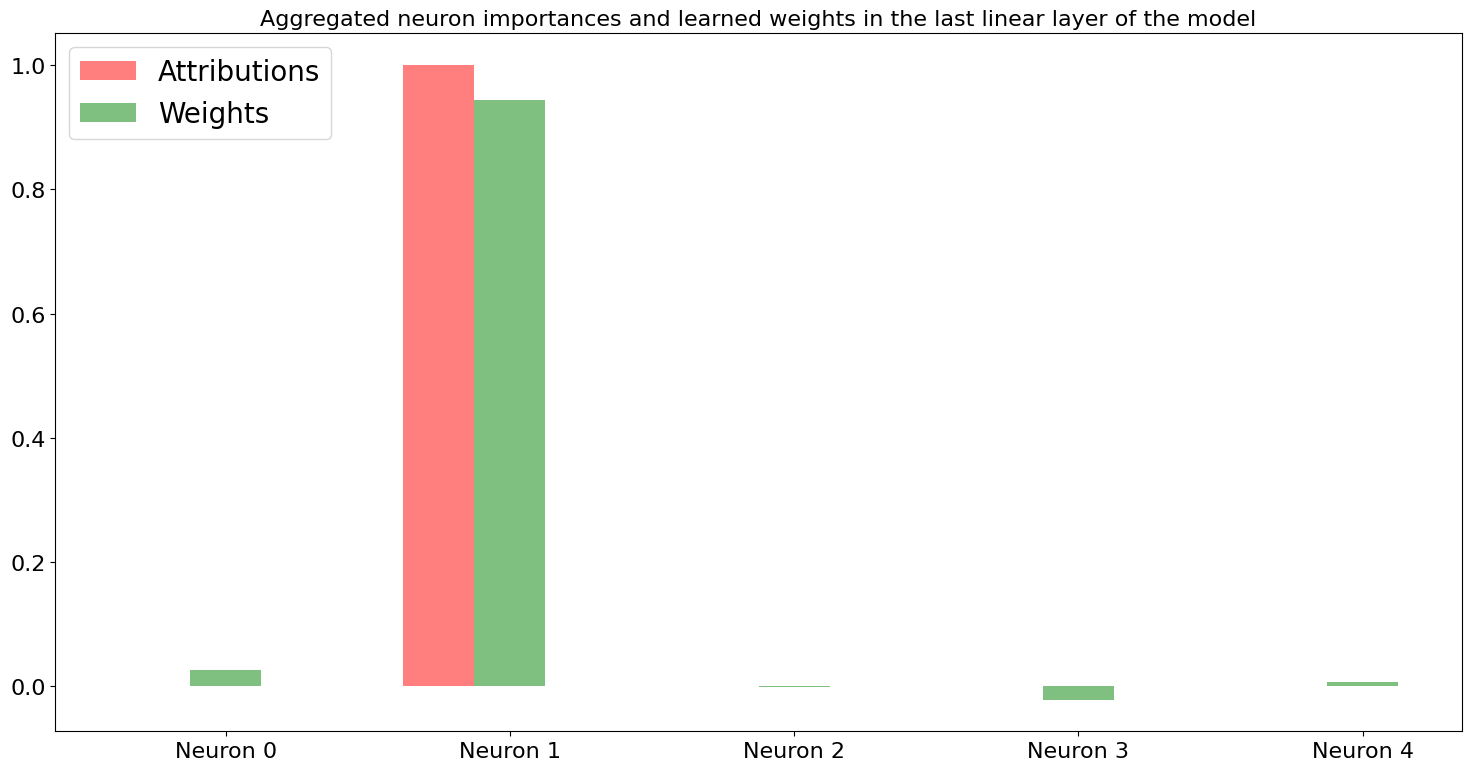

In [ ]:
plt.figure(figsize=(15, 8))

x_axis_data = np.arange(lc_attr_test.shape[1])

y_axis_lc_attr_test = lc_attr_test.mean(0).detach().numpy()
y_axis_lc_attr_test = y_axis_lc_attr_test / np.linalg.norm(y_axis_lc_attr_test, ord=1)

y_axis_lin4_weight = lin4_weight[0].detach().numpy()
y_axis_lin4_weight = y_axis_lin4_weight / np.linalg.norm(y_axis_lin4_weight, ord=1)

width = 0.25
legends = ['Attributions','Weights']
x_axis_labels = [ 'Neuron {}'.format(i) for i in range(len(y_axis_lin4_weight))]

ax = plt.subplot()
ax.set_title('Aggregated neuron importances and learned weights in the last linear layer of the model')

ax.bar(x_axis_data + width, y_axis_lc_attr_test, width, align='center', alpha=0.5, color='red')
ax.bar(x_axis_data + 2 * width, y_axis_lin4_weight, width, align='center', alpha=0.5, color='green')
plt.legend(legends, loc=2, prop={'size': 20})
ax.autoscale_view()
plt.tight_layout()

ax.set_xticks(x_axis_data + 0.5)
ax.set_xticklabels(x_axis_labels)

plt.show()

> Train a separate model with the same configuration but now standardise the features via **StandardScaler** (fit to training set, then transform all). State your observations with respect to GradientShap and explain why it has occurred.
(Hint: Many gradient-based approaches depend on a baseline, which is an important choice to be made. Check the default baseline settings carefully.)


In [ ]:
from sklearn import preprocessing
X_train_unscaled = train_data.drop(target_column, axis = 1)
y_train_unscaled = train_data['resale_price']

X_test_unscaled = test_data.drop(target_column, axis = 1)
y_test_unscaled = test_data['resale_price']

standard_scaler = preprocessing.StandardScaler()
X_train_scaled = standard_scaler.fit_transform(X_train_unscaled)
X_test_scaled = standard_scaler.transform(X_test_unscaled)

y_train_scaled = y_train_unscaled.to_numpy()
y_test_scaled = y_test_unscaled.to_numpy()

X_test_sample_scaled = X_test_unscaled.sample(1000, random_state = SEED)
X_test_sample_scaled = standard_scaler.transform(X_test_sample_scaled)

#y_train_scaled = standard_scaler.fit_transform(y_train_unscaled) #NOT SURE IF THE OUTPUTS SHOULD BE SCALED
#y_test_scaled = standard_scaler.transform(y_test_unscaled) #NOT SURE IF THE OUTPUTS SHOULD BE SCALED

In [ ]:
# TODO: Enter your code here

X_train_scaled = torch.tensor(X_train_scaled).float()
y_train_scaled = torch.tensor(y_train_scaled).view(-1, 1).float()

X_test_scaled = torch.tensor(X_test_scaled).float()
y_test_scaled = torch.tensor(y_test_scaled).view(-1, 1).float()

X_test_sample_scaled = torch.tensor(X_test_sample_scaled).float()

scaled_datasets = torch.utils.data.TensorDataset(X_train_scaled, y_train_scaled)
scaled_train_iter = torch.utils.data.DataLoader(scaled_datasets, batch_size = 1024, shuffle=True)


In [ ]:
def train_scaled(model_inp, num_epochs = num_epochs):
    optimizer = torch.optim.Adam(model_inp.parameters(), lr = learning_rate)
    for epoch in range(num_epochs):  # loop over the dataset multiple times
        running_loss = 0.0
        for inputs, labels in scaled_train_iter:
            # forward pass
            outputs = model_inp(inputs)
            # defining loss
            loss = criterion(outputs, labels)
            # zero the parameter gradients
            optimizer.zero_grad()
            # computing gradients
            loss.backward()
            # accumulating running loss
            running_loss += loss.item()
            # updated weights based on computed gradients
            optimizer.step()
        if epoch % 20 == 0:
            print('Epoch [%d]/[%d] running accumulative loss across all batches: %.3f' %
                  (epoch + 1, num_epochs, running_loss))
        running_loss = 0.0

In [ ]:
model_scaled = HDBHousingModel()
criterion = nn.MSELoss(reduction='sum')
model_scaled.train()

HDBHousingModel(
  (lin1): Linear(in_features=6, out_features=5, bias=True)
  (relu1): ReLU()
  (lin2): Linear(in_features=5, out_features=5, bias=True)
  (relu2): ReLU()
  (lin3): Linear(in_features=5, out_features=5, bias=True)
  (relu3): ReLU()
  (lin4): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
train_scaled(model_scaled)

Epoch [1]/[200] running accumulative loss across all batches: 13859062949085184.000
Epoch [21]/[200] running accumulative loss across all batches: 13655819669209088.000
Epoch [41]/[200] running accumulative loss across all batches: 11733346723823616.000
Epoch [61]/[200] running accumulative loss across all batches: 7519569472126976.000
Epoch [81]/[200] running accumulative loss across all batches: 3546105356746752.000
Epoch [101]/[200] running accumulative loss across all batches: 1802916243439616.000
Epoch [121]/[200] running accumulative loss across all batches: 1276735490359296.000
Epoch [141]/[200] running accumulative loss across all batches: 937977519800320.000
Epoch [161]/[200] running accumulative loss across all batches: 677236756709376.000
Epoch [181]/[200] running accumulative loss across all batches: 499930552598528.000


In [ ]:
model_scaled.eval()
outputs_scaled = model_scaled(X_test_scaled)

In [ ]:
outputs_scaled # Debugging

tensor([[221467.6875],
        [221467.6875],
        [239940.3594],
        ...,
        [623860.0000],
        [513265.0000],
        [718598.3750]], grad_fn=<AddmmBackward0>)

In [ ]:
y_test_scaled # Debugging

tensor([[211000.],
        [225000.],
        [260000.],
        ...,
        [755000.],
        [848000.],
        [865000.]])

In [ ]:
err_scaled = np.sqrt(mean_squared_error(outputs_scaled.detach().numpy(), y_test.detach().numpy()))

print('model err: ', err_scaled)

model err:  108961.49


In [ ]:
ig_scaled = IntegratedGradients(model_scaled)
gs_scaled = GradientShap(model_scaled)
fa_scaled = FeatureAblation(model_scaled)
sa_scaled = Saliency(model_scaled)
ixg_scaled = InputXGradient(model_scaled)

ig_scaled_attr_test = ig_scaled.attribute(X_test_sample_scaled, n_steps=50)
ixg_scaled_attr_test = ixg_scaled.attribute(X_test_sample_scaled)
sa_scaled_attr_test = sa_scaled.attribute(X_test_sample_scaled)
gs_scaled_attr_test = gs_scaled.attribute(X_test_sample_scaled, X_train_scaled)
fa_scaled_attr_test = fa_scaled.attribute(X_test_sample_scaled)

/usr/local/lib/python3.10/dist-packages/captum/_utils/gradient.py:57: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  warnings.warn(


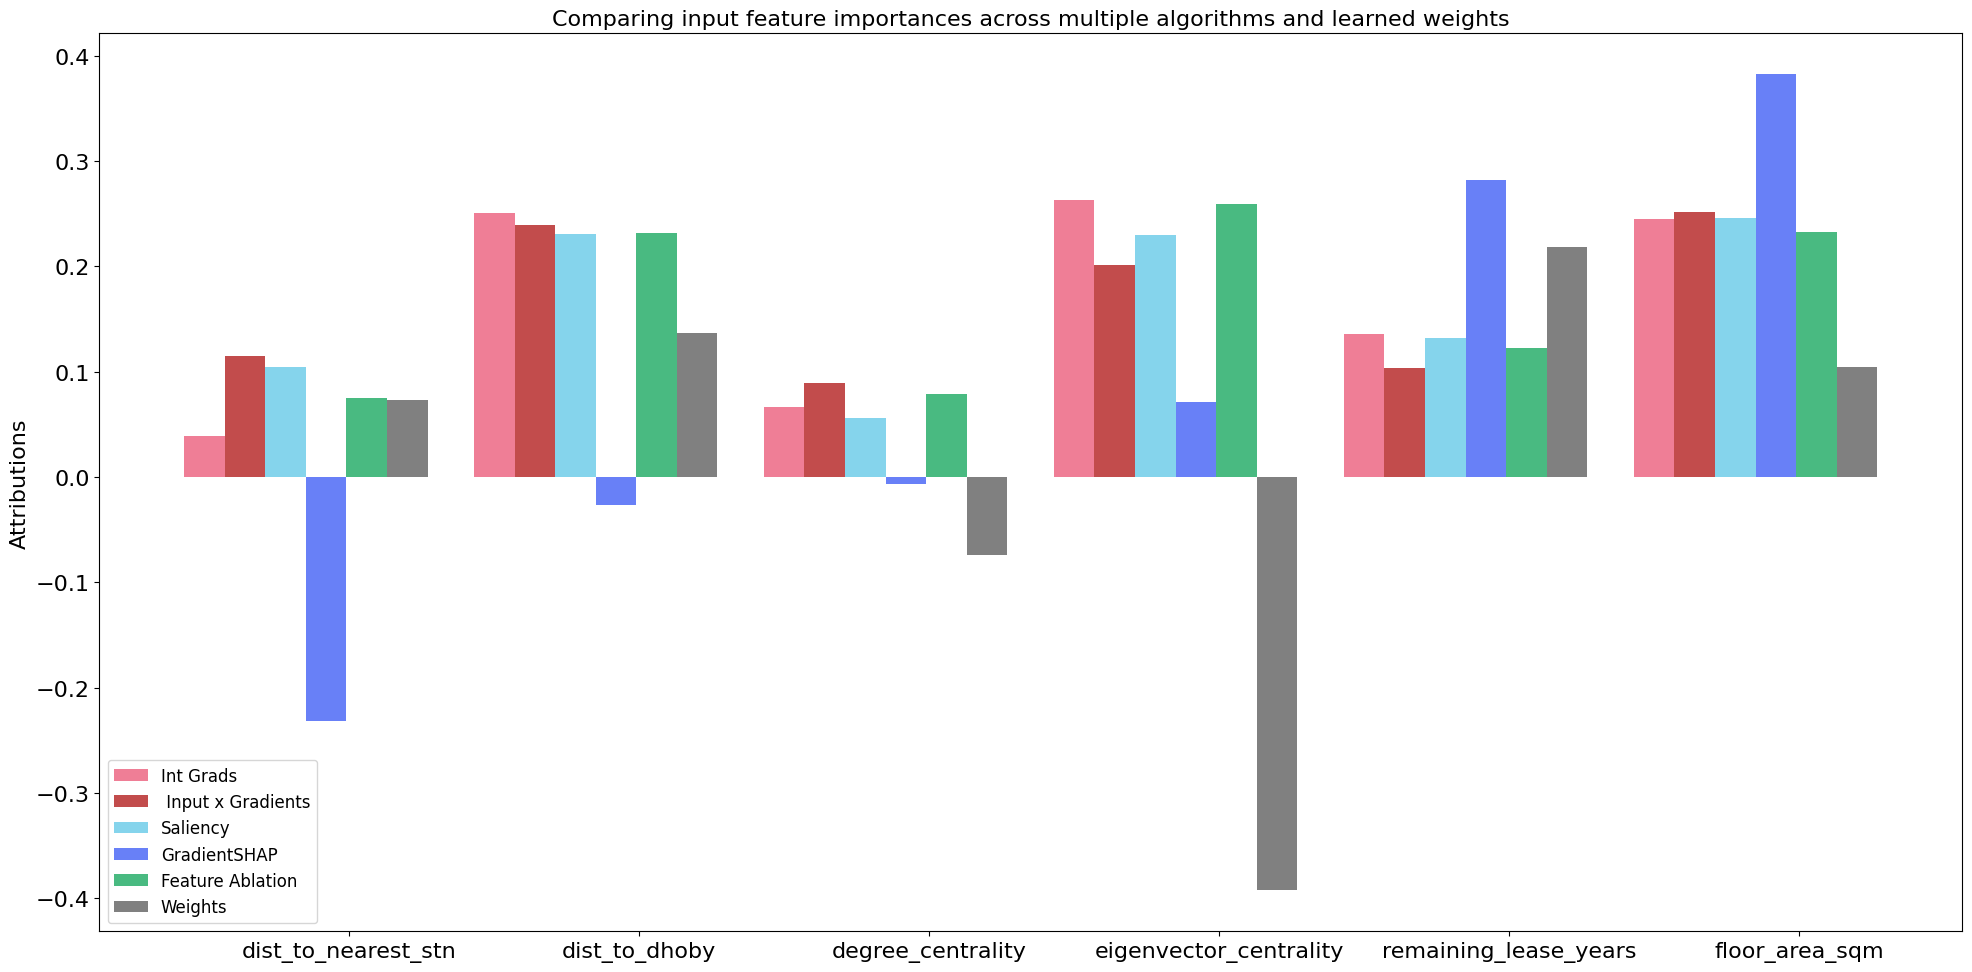

In [ ]:
x_scaled_axis_data = np.arange(X_test_sample_scaled.shape[1])
x_scaled_axis_data_labels = list(map(lambda idx: continuous_columns[idx], x_scaled_axis_data))

ig_scaled_attr_test_sum = ig_scaled_attr_test.detach().numpy().sum(0)
ig_scaled_attr_test_norm_sum = ig_scaled_attr_test_sum / np.linalg.norm(ig_scaled_attr_test_sum, ord=1)

ixg_scaled_attr_test_sum = ixg_scaled_attr_test.detach().numpy().sum(0)
ixg_scaled_attr_test_norm_sum = ixg_scaled_attr_test_sum / np.linalg.norm(ixg_scaled_attr_test_sum, ord=1)

sa_scaled_attr_test_sum = sa_scaled_attr_test.detach().numpy().sum(0)
sa_scaled_attr_test_norm_sum = sa_scaled_attr_test_sum / np.linalg.norm(sa_scaled_attr_test_sum, ord=1)

gs_scaled_attr_test_sum = gs_scaled_attr_test.detach().numpy().sum(0)
gs_scaled_attr_test_norm_sum = gs_scaled_attr_test_sum / np.linalg.norm(gs_scaled_attr_test_sum, ord=1)

fa_scaled_attr_test_sum = fa_scaled_attr_test.detach().numpy().sum(0)
fa_scaled_attr_test_norm_sum = fa_scaled_attr_test_sum / np.linalg.norm(fa_scaled_attr_test_sum, ord=1)

lin_weight = model_scaled.lin1.weight[0].detach().numpy()
y_axis_lin_weight = lin_weight / np.linalg.norm(lin_weight, ord=1)

width = 0.14
legends = ['Int Grads', ' Input x Gradients','Saliency', 'GradientSHAP', 'Feature Ablation', 'Weights']

plt.figure(figsize=(20, 10))

ax = plt.subplot()
ax.set_title('Comparing input feature importances across multiple algorithms and learned weights')
ax.set_ylabel('Attributions')

FONT_SIZE = 16
plt.rc('font', size=FONT_SIZE)            # fontsize of the text sizes
plt.rc('axes', titlesize=FONT_SIZE)       # fontsize of the axes title
plt.rc('axes', labelsize=FONT_SIZE)       # fontsize of the x and y labels
plt.rc('legend', fontsize=FONT_SIZE - 4)  # fontsize of the legend

ax.bar(x_scaled_axis_data, ig_scaled_attr_test_norm_sum, width, align='center', alpha=0.8, color='#eb5e7c')
ax.bar(x_scaled_axis_data + width, ixg_scaled_attr_test_norm_sum, width, align='center', alpha=0.7, color='#A90000')
ax.bar(x_scaled_axis_data + 2 * width, sa_scaled_attr_test_norm_sum, width, align='center', alpha=0.6, color='#34b8e0')
ax.bar(x_scaled_axis_data + 3 * width, gs_scaled_attr_test_norm_sum, width, align='center',  alpha=0.8, color='#4260f5')
ax.bar(x_scaled_axis_data + 4 * width, fa_scaled_attr_test_norm_sum, width, align='center', alpha=1.0, color='#49ba81')
ax.bar(x_scaled_axis_data + 5 * width, y_axis_lin_weight, width, align='center', alpha=1.0, color='grey')
ax.autoscale_view()
plt.tight_layout()

ax.set_xticks(x_scaled_axis_data + 0.5)
ax.set_xticklabels(x_scaled_axis_data_labels)

plt.legend(legends, loc=3)
plt.show()

In [ ]:
lc_scaled = LayerConductance(model_scaled, model_scaled.lin4)

# shape: test_examples x size_hidden
lc_scaled_attr_test = lc_scaled.attribute(X_test_sample_scaled, n_steps=100, attribute_to_layer_input=True)

# weights from forth linear layer
# shape: size_hidden4 x size_hidden3
lin4_scaled_weight = model_scaled.lin4.weight

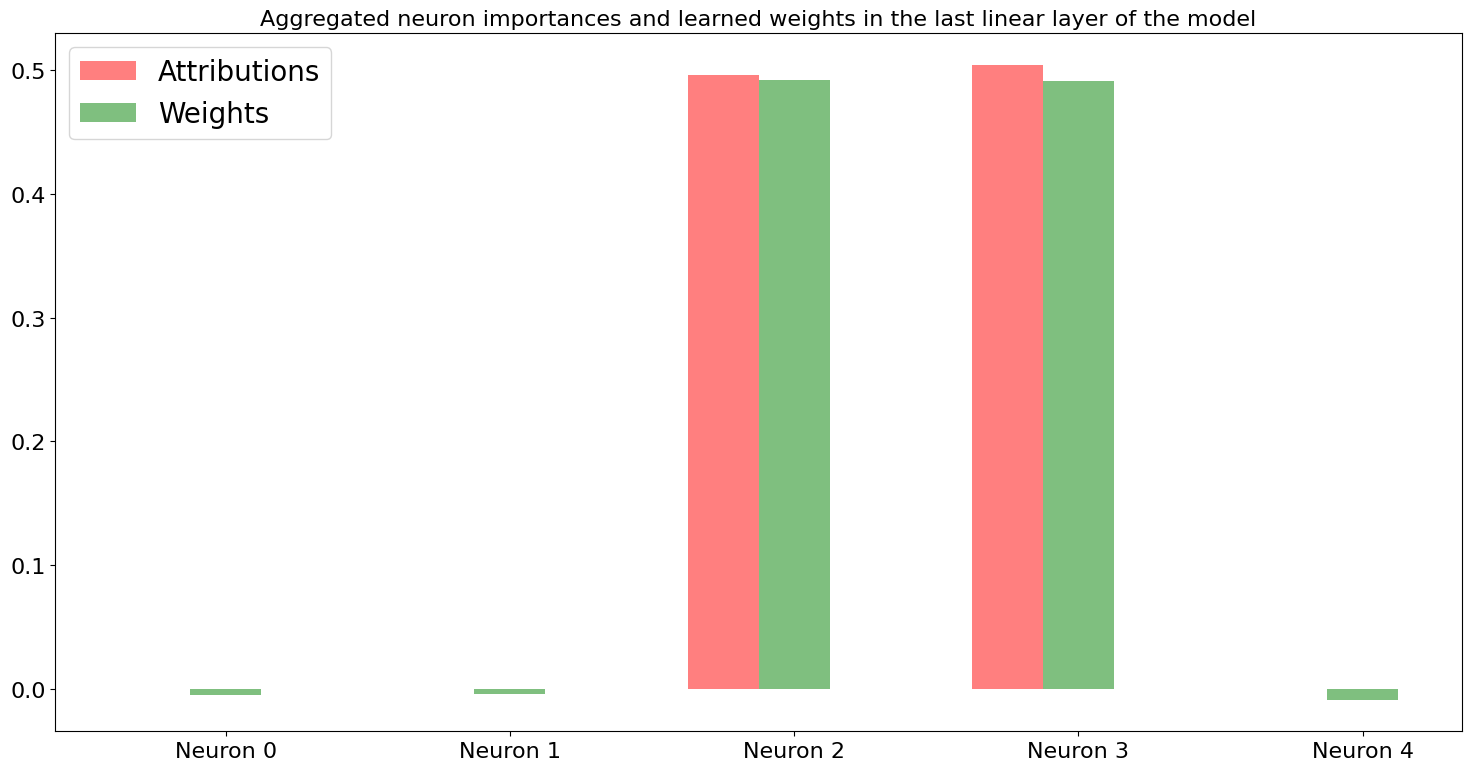

In [ ]:
plt.figure(figsize=(15, 8))

x_scaled_axis_data = np.arange(lc_scaled_attr_test.shape[1])

y_scaled_axis_lc_attr_test = lc_scaled_attr_test.mean(0).detach().numpy()
y_scaled_axis_lc_attr_test = y_scaled_axis_lc_attr_test / np.linalg.norm(y_scaled_axis_lc_attr_test, ord=1)

y_scaled_axis_lin4_weight = lin4_scaled_weight[0].detach().numpy()
y_scaled_axis_lin4_weight = y_scaled_axis_lin4_weight / np.linalg.norm(y_scaled_axis_lin4_weight, ord=1)

width = 0.25
legends = ['Attributions','Weights']
x_scaled_axis_labels = [ 'Neuron {}'.format(i) for i in range(len(y_scaled_axis_lin4_weight))]

ax = plt.subplot()
ax.set_title('Aggregated neuron importances and learned weights in the last linear layer of the model')

ax.bar(x_scaled_axis_data + width, y_scaled_axis_lc_attr_test, width, align='center', alpha=0.5, color='red')
ax.bar(x_scaled_axis_data + 2 * width, y_scaled_axis_lin4_weight, width, align='center', alpha=0.5, color='green')
plt.legend(legends, loc=2, prop={'size': 20})
ax.autoscale_view()
plt.tight_layout()

ax.set_xticks(x_scaled_axis_data + 0.5)
ax.set_xticklabels(x_scaled_axis_labels)

plt.show()

Observations regarding GradientSHAP: GradientSHAP produces differennt results in comparasion to most other models because its baseline is the training dataset. Whereas, for the other models the default baseline is used, which is the baseline of all zeros. In addition, in the first model an unscaled version of the training set is used as the baseline, whereas in the second model a scaled version of the training set is used. This can affect the attribution scores because just like like other gradient explainability algorithms GradientSHAP can be affected by the magnitude of its baseline input features because attribution scores are based on them. In such a scenario, scaling the training data before using it as the baseline is appropriate because it would not allow for features with larger magnitudes to dominate when calculating the gradient. Hence, this allows us to interpret the impact of scaling the data that is used as the baseline.

Read https://distill.pub/2020/attribution-baselines/ to build up your understanding of Integrated Gradients (IG). Reading the sections before the section on ‘Game Theory and Missingness’ will be sufficient. Keep in mind that this article mainly focuses on classification problems. You might find the following [descriptions](https://captum.ai/docs/attribution_algorithms) and [comparisons](https://captum.ai/docs/algorithms_comparison_matrix) in Captum useful as well.


Then, answer the following questions in the context of our dataset:

> Why did Saliency produce scores similar to IG?


\# TODO: \<Firstly, in our model which encapsulates a relatively simple relation between the input features and the output, the results prioduced by Saliency and IG can be comparable because in our case they both use a baseline of all zeros and rely on the model's gradients with respect to the input features.

Secondly, IG and Saliency can produce similar results because of scaling because if we see before scaling the results were different. Scaling results in input features having a value between 0 and 1. This results in having a input feature values close to the baseline of all zeros, which is used in both the models. Having input feature values close to the baseline results in a short path created by IG between the basline and input data which does not capture variations in model's behaviour and may peoduce results resembling those of Saliency.

Thirdly, both the algorithms resulting in similar results can be attributed to our model being a linear regression model.

For IG to produce more informative results we should use a baseline that is significantly different from the input data.\>

> Why did Input x Gradients give the same attribution scores as IG?


\# TODO: \<Firstly, because both Input X Gradients and IG calculate integrated gradients according to a baseline, they are likely to result in similar results. In our code because we have used default baseline of zeros in both the cases the results produced are similar.

Secondly, both IG and input X Gradients calculate the attribution of features based on the sampling points along the path, a baseline of zeros does not provide a sufficient sample to capture the input interations. Hence, resulting in similar results.

Thirdly, both the algorithms resulting in similar results can be attributed to our model being a linear regression model. This is because the impact of the varying input features is refected in a similar manner by both the algorithms in the case of linear models.

This inidicates the importance of selecting baselines when calculating the attribution scores.\>